## Libs

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [49]:
import os
from tqdm import tqdm

## Carregando dados

In [1]:
DB_FATURAMENTO_PATH = './data/raw/faturamento_lojas_atuais.csv'
DB_EXPANSAO_PATH    = './data/raw/cenarios_expansao.csv'
DB_ATUAL_PATH       = './data/raw/lojas_atuais.csv'

In [127]:
DB_FATURAMENTO = pd.read_csv(DB_FATURAMENTO_PATH)
DB_EXPANSAO    = pd.read_csv(DB_EXPANSAO_PATH)
DB_ATUAL       = pd.read_csv(DB_ATUAL_PATH)

## Exploração

### Características Gerais

#### Faturamento

In [130]:
DB_FATURAMENTO.shape

(1003094, 6)

In [131]:
DB_FATURAMENTO.cod_loja.nunique()

3130

In [134]:
DB_FATURAMENTO.categoria.nunique()

16

In [100]:
DB_FATURAMENTO.dtypes

cod_loja       int64
ano            int64
mes            int64
categoria     object
qtde         float64
receita      float64
dtype: object

In [101]:
DB_FATURAMENTO.describe()

,cod_loja,ano,mes,qtde,receita
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,1800.019900,2016.500640,6.52395,204.346660,9254.045708
std,1054.093888,0.500002,3.45149,350.693769,23400.640658
min,1.000000,2016.000000,1.00000,0.000000,0.000000
25%,883.000000,2016.000000,4.00000,20.000000,605.400000
50%,1782.000000,2017.000000,7.00000,76.000000,2256.330000
75%,2710.000000,2017.000000,10.00000,248.000000,7652.922500
max,3687.000000,2017.000000,12.00000,12160.000000,676571.200000


In [102]:
DB_FATURAMENTO.isna().sum()

cod_loja     0
ano          0
mes          0
categoria    0
qtde         0
receita      0
dtype: int64

#### Lojas Atuais

In [103]:
DB_ATUAL.shape

(3130, 21)

In [129]:
DB_ATUAL.cod_loja.nunique()

3130

In [104]:
DB_ATUAL.dtypes

cod_loja           int64
cod_ap             int64
cod_municipio      int64
feature_01        object
feature_02        object
feature_03          bool
feature_04       float64
feature_05        object
feature_06         int64
feature_07       float64
feature_08       float64
feature_09       float64
feature_10       float64
feature_11        object
feature_12        object
feature_13       float64
feature_14       float64
feature_15       float64
feature_16       float64
feature_17       float64
feature_18       float64
dtype: object

In [105]:
DB_ATUAL.describe()

,cod_loja,cod_ap,cod_municipio,feature_04,feature_06,feature_07,feature_08,feature_09,feature_10,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
count,3130.000000,3.130000e+03,3.130000e+03,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,1839.213099,3.192585e+12,3.192585e+06,34.211572,5.694249,0.172759,0.167303,601.694780,3.930018,94.810297,83.685355,82.432265,96.229977,83.411556,88.313844
std,1066.212140,1.131140e+12,1.131141e+06,13.856980,4.909679,0.046540,0.048109,1378.521556,2.652975,8.595425,13.544473,34.618763,12.969268,17.312735,9.216627
min,1.000000,-1.000000e+00,-1.000000e+00,3.500000,0.000000,0.063885,0.039413,1.435852,0.415691,44.100000,0.000000,0.000000,50.000000,13.100000,42.100000
25%,909.250000,2.613528e+12,2.613528e+06,25.520000,3.000000,0.139606,0.132701,11.918795,2.415590,92.275000,79.700000,94.975000,100.000000,72.025000,83.525000
50%,1836.500000,3.306008e+12,3.306008e+06,31.745000,4.000000,0.178109,0.173879,56.900877,3.158984,100.000000,86.900000,100.000000,100.000000,91.200000,90.500000
75%,2774.500000,3.552403e+12,3.552403e+06,41.000000,7.000000,0.200619,0.194120,334.697774,4.487626,100.000000,91.850000,100.000000,100.000000,97.600000,95.600000
max,3687.000000,5.300108e+12,5.300108e+06,117.360000,63.000000,0.410692,0.388174,5593.905463,31.796502,100.000000,100.000000,100.000000,100.000000,100.000000,99.900000


In [106]:
DB_ATUAL.isna().sum()/len(DB_ATUAL)

cod_loja         0.000000
cod_ap           0.000000
cod_municipio    0.000000
feature_01       0.625879
feature_02       0.000000
feature_03       0.000000
feature_04       0.000000
feature_05       0.000000
feature_06       0.000000
feature_07       0.000000
feature_08       0.000000
feature_09       0.000000
feature_10       0.000000
feature_11       0.921725
feature_12       0.921725
feature_13       0.720767
feature_14       0.720767
feature_15       0.720767
feature_16       0.720767
feature_17       0.720767
feature_18       0.720767
dtype: float64

#### Lojas Expansão

In [107]:
DB_EXPANSAO.shape

(553, 21)

In [132]:
DB_EXPANSAO.cod_loja.nunique()

553

In [141]:
DB_ATUAL.feature_11.unique()

array([nan, 'FEATURE_11_VALUE_02', 'FEATURE_11_VALUE_06',
       'FEATURE_11_VALUE_07', 'FEATURE_11_VALUE_01',
       'FEATURE_11_VALUE_04', 'FEATURE_11_VALUE_03',
       'FEATURE_11_VALUE_05'], dtype=object)

In [154]:
DB_ATUAL.feature_15.unique()

array([  nan, 100. ,   0. ,  66.7,  33.3,  16.7,  86.7,  50. ,  93.3,
        83.3,  80. ,  75. ,  91.7,  25. ,  60. ,  73.3])

In [108]:
DB_EXPANSAO.dtypes

cod_loja           int64
cod_ap             int64
cod_municipio      int64
feature_01        object
feature_02        object
feature_03          bool
feature_04       float64
feature_05        object
feature_06         int64
feature_07       float64
feature_08       float64
feature_09       float64
feature_10       float64
feature_11        object
feature_12        object
feature_13       float64
feature_14       float64
feature_15       float64
feature_16       float64
feature_17       float64
feature_18       float64
dtype: object

In [144]:
DB_ATUAL.describe()

,cod_loja,cod_ap,cod_municipio,feature_04,feature_06,feature_07,feature_08,feature_09,feature_10,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
count,3130.000000,3.130000e+03,3.130000e+03,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,1839.213099,3.192585e+12,3.192585e+06,34.211572,5.694249,0.172759,0.167303,601.694780,3.930018,94.810297,83.685355,82.432265,96.229977,83.411556,88.313844
std,1066.212140,1.131140e+12,1.131141e+06,13.856980,4.909679,0.046540,0.048109,1378.521556,2.652975,8.595425,13.544473,34.618763,12.969268,17.312735,9.216627
min,1.000000,-1.000000e+00,-1.000000e+00,3.500000,0.000000,0.063885,0.039413,1.435852,0.415691,44.100000,0.000000,0.000000,50.000000,13.100000,42.100000
25%,909.250000,2.613528e+12,2.613528e+06,25.520000,3.000000,0.139606,0.132701,11.918795,2.415590,92.275000,79.700000,94.975000,100.000000,72.025000,83.525000
50%,1836.500000,3.306008e+12,3.306008e+06,31.745000,4.000000,0.178109,0.173879,56.900877,3.158984,100.000000,86.900000,100.000000,100.000000,91.200000,90.500000
75%,2774.500000,3.552403e+12,3.552403e+06,41.000000,7.000000,0.200619,0.194120,334.697774,4.487626,100.000000,91.850000,100.000000,100.000000,97.600000,95.600000
max,3687.000000,5.300108e+12,5.300108e+06,117.360000,63.000000,0.410692,0.388174,5593.905463,31.796502,100.000000,100.000000,100.000000,100.000000,100.000000,99.900000


In [110]:
DB_EXPANSAO.isna().sum()/len(DB_EXPANSAO)

cod_loja         0.000000
cod_ap           0.000000
cod_municipio    0.000000
feature_01       0.658228
feature_02       0.000000
feature_03       0.000000
feature_04       0.000000
feature_05       0.000000
feature_06       0.000000
feature_07       0.000000
feature_08       0.000000
feature_09       0.000000
feature_10       0.000000
feature_11       0.925859
feature_12       0.925859
feature_13       0.712477
feature_14       0.712477
feature_15       0.712477
feature_16       0.712477
feature_17       0.712477
feature_18       0.712477
dtype: float64

### Visualizações Gráficas

In [115]:
def calc_offset_date(ano, mes, min_ano = None, min_mes = None):
    '''
    Retorna o valor de offset_date
    '''
    
    if not min_ano:
        min_ano = DB_FATURAMENTO.ano.min()
    
    if not min_mes:
        min_mes = DB_FATURAMENTO[DB_FATURAMENTO.ano == min_ano].mes.min()
        
    offset_date = (ano - min_ano) * (12) + mes - min_mes
    
    return offset_date

def get_offset_date():
    '''
    Coleta o vetor de offset_date
    '''   
        
    min_ano = DB_FATURAMENTO.ano.min()
    min_mes = DB_FATURAMENTO[DB_FATURAMENTO.ano == min_ano].mes.min()
    
    offset_date_list = []
    
    for i in tqdm(range(len(DB_FATURAMENTO))):
        
        row = DB_FATURAMENTO.loc[i]
        offset_date = calc_offset_date(row.ano, row.mes, min_ano, min_mes)
        offset_date_list.append(offset_date)
        
    return offset_date_list

In [136]:
%%time

DB_FATURAMENTO['offset_date'] = get_offset_date()

100%|██████████| 1003094/1003094 [04:14<00:00, 3944.23it/s]


CPU times: user 3min 59s, sys: 1.63 s, total: 4min 1s
Wall time: 4min 14s


In [117]:
DB_FATURAMENTO.offset_date

0        10
1        21
2         8
3         9
4        12
         ..
99995    19
99996     8
99997     0
99998    20
99999     2
Name: offset_date, Length: 100000, dtype: int64

In [214]:
DB_FATURAMENTO.describe()

,cod_loja,ano,mes,qtde,receita,offset_date
count,1.003094e+06,1.003094e+06,1.003094e+06,1.003094e+06,1.003094e+06,1.003094e+06
mean,1.801101e+03,2.016502e+03,6.511972e+00,2.043899e+02,9.334457e+03,1.153674e+01
std,1.054476e+03,4.999960e-01,3.454766e+00,3.482261e+02,2.367026e+04,6.929511e+00
min,1.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.830000e+02,2.016000e+03,4.000000e+00,2.000000e+01,6.005375e+02,6.000000e+00
50%,1.784000e+03,2.017000e+03,7.000000e+00,7.700000e+01,2.252815e+03,1.200000e+01
75%,2.711000e+03,2.017000e+03,1.000000e+01,2.490000e+02,7.675568e+03,1.800000e+01
max,3.687000e+03,2.017000e+03,1.200000e+01,1.216000e+04,9.751064e+05,2.300000e+01


offset_date
0      441833.37
1      395340.22
2      587810.18
3      534618.84
4      595477.92
5      589947.05
6      563814.03
7      625181.36
8      583509.12
9      611797.30
10     876921.63
11    1257613.00
12     404108.77
13     483610.18
14     626291.59
15     612062.60
16     748281.98
17     700312.65
18     646369.23
19     757850.68
20     602313.53
21     637339.76
22     891173.22
23    1216996.84
Name: receita, dtype: float64

In [231]:
DB_FATURAMENTO.groupby(['categoria', 'ano']).sum().receita

categoria  ano 
CATEG_01   2016    3.274950e+07
           2017    3.671004e+07
CATEG_02   2016    4.302249e+06
           2017    3.204834e+06
CATEG_03   2016    1.429439e+08
           2017    1.929103e+08
CATEG_04   2016    6.072971e+07
           2017    5.590724e+07
CATEG_05   2016    5.631601e+08
           2017    6.259642e+08
CATEG_06   2016    5.627115e+07
           2017    4.792878e+07
CATEG_07   2016    2.815322e+08
           2017    2.881374e+08
CATEG_08   2016    3.462236e+08
           2017    3.759368e+08
CATEG_09   2016    4.844832e+08
           2017    4.566546e+08
CATEG_10   2016    9.191629e+07
           2017    8.673872e+07
CATEG_11   2016    2.314825e+09
           2017    2.295748e+09
CATEG_12   2016    2.249023e+08
           2017    2.208111e+08
CATEG_13   2016    1.797907e+07
           2017    1.783196e+07
CATEG_14   2016    1.287487e+07
           2017    2.392919e+07
CATEG_15   2016    1.471117e+04
           2017    1.616837e+04
CATEG_16   2016    2.999

In [217]:
DB_ATUAL.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.215967,...,1562.674817,3.670883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.190102,...,5593.905463,2.815883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.141988,...,12.824022,7.218132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.107619,...,325.531120,1.972944,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,100.0,88.1,100.0,100.0,88.5,93.8


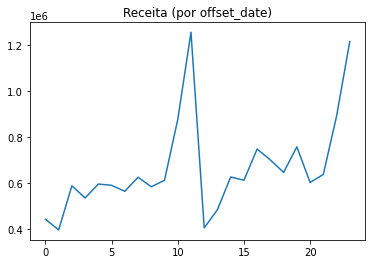

In [210]:
_ = plt.plot(DB_FATURAMENTO[DB_FATURAMENTO.cod_loja == 1].groupby('offset_date')['receita'].sum())
_ = plt.title('Receita (por offset_date)')

In [203]:
DB_FATURAMENTO[DB_FATURAMENTO.cod_loja == 235]

,cod_loja,ano,mes,categoria,qtde,receita,offset_date


In [209]:
DB_ATUAL.cod_loja.head(17)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     11
10    12
11    14
12    15
13    17
14    18
15    19
16    20
Name: cod_loja, dtype: int64

In [167]:
DB_EXPANSAO.groupby('cod_municipio').count().cod_loja.sort_values()[::-1][:10]

cod_municipio
 3550308    41
-1          30
 3304557    12
 2927408    10
 3106200     9
 4106902     9
 4314902     7
 3543402     7
 2611606     6
 3170206     6
Name: cod_loja, dtype: int64

In [185]:
DB_ATUAL[DB_ATUAL.cod_municipio == -1].isna().sum()/len(DB_ATUAL[DB_ATUAL.cod_municipio == -1])

cod_loja         0.000000
cod_ap           0.000000
cod_municipio    0.000000
feature_01       0.596026
feature_02       0.000000
feature_03       0.000000
feature_04       0.000000
feature_05       0.000000
feature_06       0.000000
feature_07       0.000000
feature_08       0.000000
feature_09       0.000000
feature_10       0.000000
feature_11       0.920530
feature_12       0.920530
feature_13       0.794702
feature_14       0.794702
feature_15       0.794702
feature_16       0.794702
feature_17       0.794702
feature_18       0.794702
dtype: float64

In [187]:
DB_ATUAL[DB_ATUAL.cod_municipio != -1].isna().sum()/len(DB_ATUAL[DB_ATUAL.cod_municipio != -1])

cod_loja         0.000000
cod_ap           0.000000
cod_municipio    0.000000
feature_01       0.627392
feature_02       0.000000
feature_03       0.000000
feature_04       0.000000
feature_05       0.000000
feature_06       0.000000
feature_07       0.000000
feature_08       0.000000
feature_09       0.000000
feature_10       0.000000
feature_11       0.921786
feature_12       0.921786
feature_13       0.717019
feature_14       0.717019
feature_15       0.717019
feature_16       0.717019
feature_17       0.717019
feature_18       0.717019
dtype: float64

In [169]:
DB_ATUAL.groupby('cod_municipio').count().cod_loja.sort_values()[::-1][:20]

cod_municipio
 3550308    184
-1          151
 3304557     70
 5300108     35
 2611606     33
 3509502     33
 3106200     32
 4106902     31
 1302603     30
 2304400     28
 4314902     27
 2927408     25
 1501402     21
 5208707     20
 3543402     17
 2408102     16
 2111300     16
 5002704     15
 2704302     15
 3549904     15
Name: cod_loja, dtype: int64

In [171]:
151/3130

0.04824281150159744

In [159]:
DB_ATUAL[DB_ATUAL.cod_municipio == -1]

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
178,3391,-1,-1,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,True,32.00,FEATURE_05_VALUE_06,6,0.107963,...,1355.486603,4.142294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,688,-1,-1,NaN,FEATURE_02_VALUE_04,False,34.50,FEATURE_05_VALUE_03,3,0.260188,...,6.502798,4.091820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,708,-1,-1,FEATURE_01_VALUE_08,FEATURE_02_VALUE_02,True,46.50,FEATURE_05_VALUE_07,4,0.168922,...,115.958848,2.349821,FEATURE_11_VALUE_01,FEATURE_12_VALUE_02,98.8,70.1,80.0,100.0,81.1,85.8
617,721,-1,-1,NaN,FEATURE_02_VALUE_04,True,35.30,FEATURE_05_VALUE_03,5,0.215967,...,1562.674817,3.670883,NaN,NaN,100.0,73.1,100.0,100.0,88.3,91.3
652,760,-1,-1,NaN,FEATURE_02_VALUE_03,False,48.04,FEATURE_05_VALUE_05,8,0.143917,...,201.530115,3.269826,NaN,NaN,100.0,83.8,0.0,100.0,94.8,92.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,3646,-1,-1,NaN,FEATURE_02_VALUE_03,True,33.30,FEATURE_05_VALUE_05,8,0.215967,...,1562.674817,3.670883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3099,3648,-1,-1,FEATURE_01_VALUE_08,FEATURE_02_VALUE_03,True,47.28,FEATURE_05_VALUE_05,5,0.215967,...,1562.674817,3.670883,FEATURE_11_VALUE_01,FEATURE_12_VALUE_01,NaN,NaN,NaN,NaN,NaN,NaN
3101,3651,-1,-1,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,True,28.34,FEATURE_05_VALUE_03,3,0.215967,...,1562.674817,3.670883,FEATURE_11_VALUE_06,FEATURE_12_VALUE_01,NaN,NaN,NaN,NaN,NaN,NaN
3106,3657,-1,-1,FEATURE_01_VALUE_03,FEATURE_02_VALUE_06,True,12.00,FEATURE_05_VALUE_06,0,0.107963,...,106.561828,2.439713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
DB_EXPANSAO.groupby('feature_12').count()/len(DB_EXPANSAO)

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
feature_12,,,,,,,,,,,,,,,,,,,,
FEATURE_12_VALUE_01,0.043400,0.043400,0.043400,0.018083,0.043400,0.043400,0.043400,0.043400,0.043400,0.043400,0.043400,0.043400,0.043400,0.043400,0.025316,0.025316,0.025316,0.025316,0.025316,0.025316
FEATURE_12_VALUE_02,0.030741,0.030741,0.030741,0.014467,0.030741,0.030741,0.030741,0.030741,0.030741,0.030741,0.030741,0.030741,0.030741,0.030741,0.012658,0.012658,0.012658,0.012658,0.012658,0.012658


In [194]:
DB_ATUAL.groupby('feature_12').count()/len(DB_ATUAL)

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
feature_12,,,,,,,,,,,,,,,,,,,,
FEATURE_12_VALUE_01,0.048562,0.048562,0.048562,0.026198,0.048562,0.048562,0.048562,0.048562,0.048562,0.048562,0.048562,0.048562,0.048562,0.048562,0.023642,0.023642,0.023642,0.023642,0.023642,0.023642
FEATURE_12_VALUE_02,0.029712,0.029712,0.029712,0.010224,0.029712,0.029712,0.029712,0.029712,0.029712,0.029712,0.029712,0.029712,0.029712,0.029712,0.013419,0.013419,0.013419,0.013419,0.013419,0.013419
